### Importing the required libraries

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("dark")
sns.set_style("white")

### Reading data from the CSV file

In [217]:
emission_table = pd.read_csv("greenhouse_gas_inventory_data_data.csv")

In [218]:
emission_table.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent


As we can see, the category data colum is having a large width that may bot be fit in pandas dataframe, hence using the colwidth for the better visibility of data across the category column.

In [219]:
pd.set_option('display.max_colwidth', -1)

In [220]:
by_category  = emission_table.groupby(['category'])

In [221]:
category_count = by_category.count()

In [222]:
category_count

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032


As we know we need to slice the category names in many parts to get the exact name of the Green House Gas. Here we can see a common thing in every category name =, i.e. *"_in_kilotonne_co2_equivalent"* at the end of every category. So my workflow for next few hours will comprise of the following things.

  * Slicing the common part from each category name and updating that with a copy of the main dataframe.
  * Slicing GHG and the other required hyperparameters like - indirect co2 or land usage forestry etc. 

### Breaking the problem in smaller part and preparing a small algo

In [223]:
strp = category_count.index

In [224]:
io = strp[0]
io[108]

't'

In [225]:
io

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'

In [226]:
hdd = len(io)
hdd

109

In [227]:
io.find("_in_kilotonne_co2_equivalent",0,hdd)

81

In [228]:
# Here we get success
io[:81]

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf'

**Conclusion for the Algorithm is to run a for loop and update each category type one by onne, then update the main category dataframe.**

### Algorithm Begins

In [229]:
new_category_index = []
for string in strp:
    p = len(string)
    pos = string.find("_in_kilotonne_co2_equivalent",0,p)
    string = string[:pos]
    new_category_index.append(string)

In [230]:
new_category_index

['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf',
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'hydrofluorocarbons_hfcs_emissions',
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'nitrogen_trifluoride_nf3_emissions',
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'perfluorocarbons_pfcs_emissions',
 'sulphur_hexafluoride_sf6_emissions',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions']

In [231]:
new_category_index_reborn = []
for lingo in new_category_index:
    q = len(lingo)
    pos = lingo.find("_without",0,p)
    lingo = lingo[:pos]
    new_category_index_reborn.append(lingo)

In [232]:
new_category_index_reborn

['carbon_dioxide_co2_emissions',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2',
 'greenhouse_gas_ghgs_emissions',
 'hydrofluorocarbons_hfcs_emission',
 'methane_ch4_emissions',
 'nitrogen_trifluoride_nf3_emission',
 'nitrous_oxide_n2o_emissions',
 'perfluorocarbons_pfcs_emission',
 'sulphur_hexafluoride_sf6_emission',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emission']

In [233]:
short_category = ["co2","ghg(indirect co2)","ghg","hfc","ch4","nf3","n2o","pfc","sf6","hfc+pfc"]

In [234]:
category_count["Shorted_category"] = short_category

In [235]:
category_count

,country_or_area,year,value,Shorted_category
category,,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,co2
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949,ghg(indirect co2)
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ghg
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975,hfc
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ch4
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248,nf3
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,n2o
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831,pfc
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032,sf6


### Cleaning the data for better comprehension

Replacing the category colum by the following:-
* carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent	= **CO2**
* greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent = **GHG(Indirect CO2)**
* greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **GHG**
* hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent = **HFC**
* methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **CH4**
* nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent = **NF3**
* nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **N2O**
* perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **PFC**
* sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent = **SF6**
* unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **HFC+PFC**

In [236]:
trying_emission = emission_table

In [237]:
replaced_emission = trying_emission.replace(to_replace=["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_"
                                     "forestry_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_including_indirect_co2"
                                    "_without_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_without_land_use_land_use"
                                    "_change_and_forestry_lulucf_in_kilotonne_co2_equivalent","hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                                    "methane_ch4_emissions_without_land_use_land_use_change"
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent",
                                    "nitrous_oxide_n2o_emissions_without_land_use_land_use_change" 
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent",
                                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent",
                                    "unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons"
                                    "_pfcs_emissions_in_kilotonne_co2_equivalent"], value = ["CO2","GHG(Indirect CO2)","GHG","HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"])


In [238]:
# replacing and changing the data and it's index for better EDA(Exploratory Data Analysis)
l = replaced_emission.groupby(["category"],as_index=False)

In [239]:
l.count()

,category,country_or_area,year,value
0,CH4,1074,1074,1074
1,CO2,1074,1074,1074
2,GHG,1074,1074,1074
3,GHG(Indirect CO2),949,949,949
4,HFC,975,975,975
5,HFC+PFC,75,75,75
6,N2O,1074,1074,1074
7,NF3,248,248,248
8,PFC,831,831,831
9,SF6,1032,1032,1032


### Exploratory Data Analysis

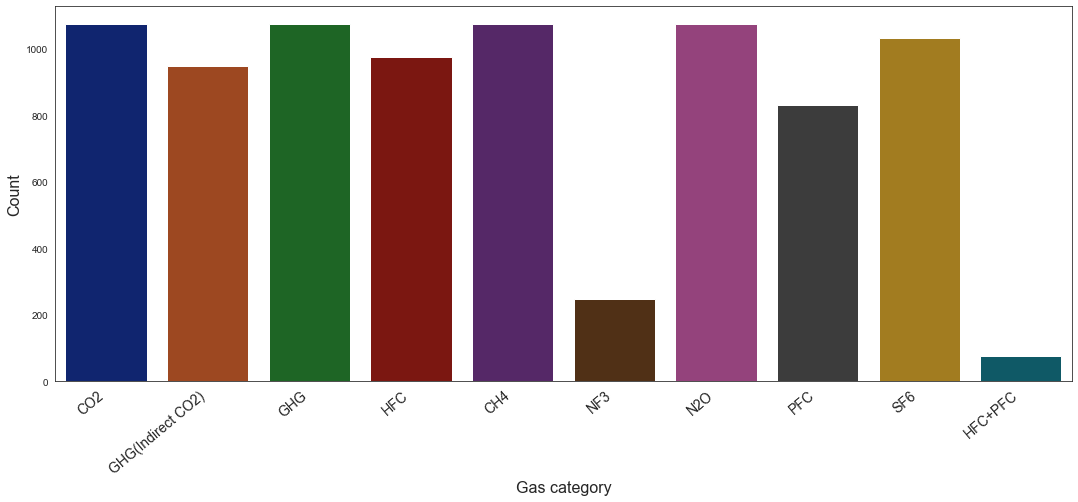

In [240]:
plt.figure(figsize=(15,7))
ax = sns.countplot(replaced_emission["category"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right", fontsize=14)
plt.tight_layout()
plt.xlabel("Gas category",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.rcParams["figure.figsize"] = [15, 10]
plt.show()

**Conclusion -1**:
    The data iteself is very irregular interms of distribution and labels. *GHG(Indirect CO2)* is a part of CO2 data. Hence *CO2* is the most occuring Green House Gas. Also the *HFC*,*PFC* anf *HFC+PFC* data can be overlapped, but the exact proportion is unknown. *NF3* turns out to be occured the least. Also *GHG* has a undefined label, we can't say exactly how much proportion of other gases are present or some of them are not present while labeling the data.

### Calculating the Total amount of gases emitted 

In [241]:
loct = replaced_emission.groupby(['category'])['value'].sum()

In [242]:
replaced_emission['Total Emitted Gas'] = replaced_emission['value'].groupby(replaced_emission['category']).transform('sum')

In [243]:
loct.values

array([7.87271139e+07, 4.64020441e+08, 5.85188513e+08, 5.57452664e+08,
       7.27289194e+06, 2.44839942e+05, 3.21367507e+07, 2.81398722e+04,
       1.51517345e+06, 1.24316251e+06])

In [244]:
new_dataframe_emission = pd.DataFrame(loct.index)

In [245]:
new_dataframe_emission["Total Amount Emitted(In Kilotones)"] = loct.values

### Sorting the dataframe to know the amount

In [246]:
new_dataframe_emission.sort_values(by=['Total Amount Emitted(In Kilotones)'], inplace=True,ascending=False)

In [247]:
new_dataframe_emission

,category,Total Amount Emitted(In Kilotones)
2,GHG,5.851885e+08
3,GHG(Indirect CO2),5.574527e+08
1,CO2,4.640204e+08
0,CH4,7.872711e+07
6,N2O,3.213675e+07
4,HFC,7.272892e+06
8,PFC,1.515173e+06
9,SF6,1.243163e+06
5,HFC+PFC,2.448399e+05
7,NF3,2.813987e+04


**Conclusion - 2:**
    Yet another problem, *GHG* category has the maximum emitted amount, *CO2* and *indirect CO2*, sums up to make *CO2* maximum. *NF3* has the least emitted amount. 

*Lets try another approach*

In [248]:
replaced_emission.head()

,country_or_area,year,value,category,Total Emitted Gas
0,Australia,2014,393126.946994,CO2,4.640204e+08
1,Australia,2013,396913.936530,CO2,4.640204e+08
2,Australia,2012,406462.847704,CO2,4.640204e+08
3,Australia,2011,403705.528314,CO2,4.640204e+08
4,Australia,2010,406200.993184,CO2,4.640204e+08


In [249]:
Australia_data = replaced_emission[replaced_emission["country_or_area"]=="Australia"].groupby(["category","year"],as_index = False)

In [250]:
data_div = pd.pivot_table(replaced_emission,values="value",index = ["country_or_area", "year"],columns = ["category"])

In [251]:
data_div.head(10)

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   
                1995  109900.735111  305162.543549  433478.650826   
                1996  109185.337720  311914.819824  439803.962228   
                1997  111898.854749  320439.116819  451721.717815   
                1998  111427.929806  334328.142647  466382.112472   
                1999  107889.224971  343713.906948  472245.990778   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   
                1995  433478.650826      1004.032111 NaN       15578.196408   
                1996  439803.962228      414.170638  NaN       16609.586778   
                1997  451721.717815      705.228318  NaN       17201.890783   
                1998  466382.112472      998.289580  NaN       17743.913106   
                1999  472245.990778      1374.293110 NaN       17933.439790   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896  
                1995 NaN   1530.835665  302.307983  
                1996 NaN   1410.395058  269.652210  
                1997 NaN   1228.150898  248.476248  
                1998 NaN   1660.518820  223.318513  
                1999 NaN   1139.058757  196.067201

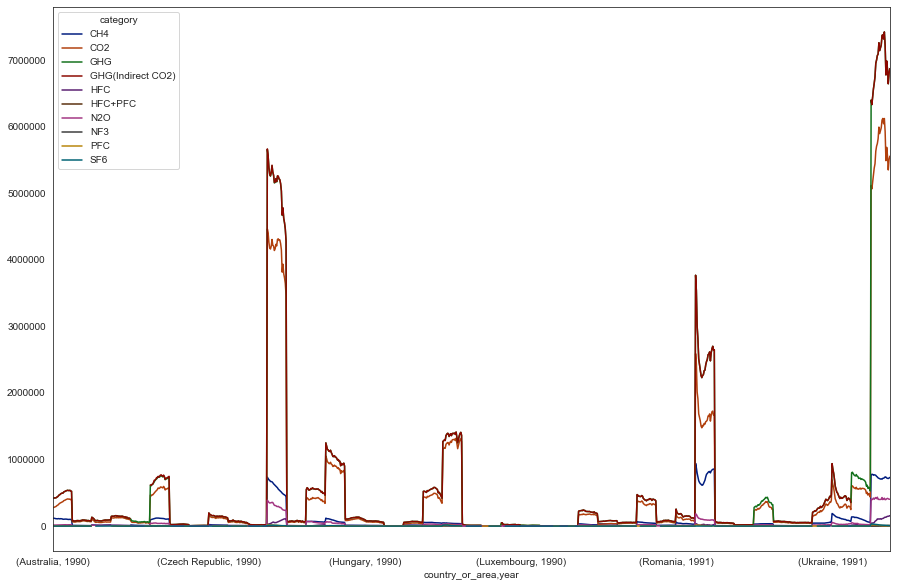

In [252]:
data_div.plot()

This doesn't depict the correct info and looks like a mess

### Plotting Country Wise

In [253]:
replaced_emission["country_or_area"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [254]:
gases = data_div.columns.values

In [255]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [256]:
# lets define a function that can plot the country data 
def plot_the_country(name):
    find = data_div.loc[name]
    plt.plot(find)
    plt.legend(gases)
    plt.tick_params(labelsize=12)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.xlim(2000,2014)

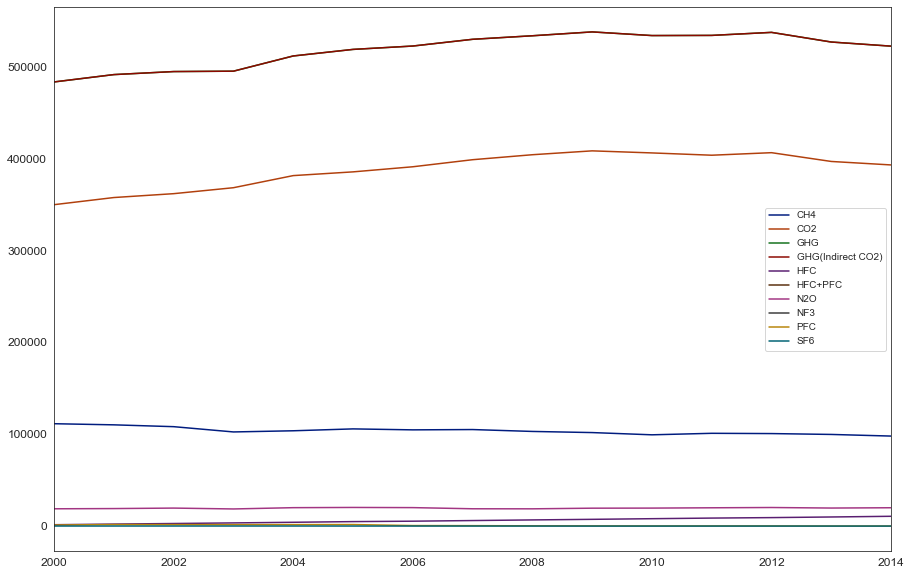

In [257]:
plot_the_country("Australia")

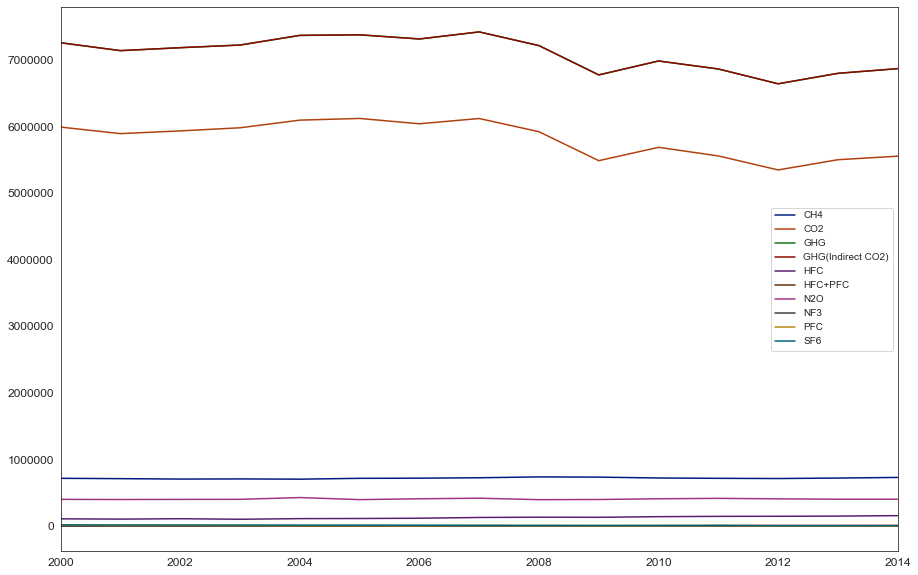

In [258]:
plot_the_country("United States of America")

During Recession from Dec,2007-June,2009, **United States Of America** had a deep decline in emission of CO2. There may be many reasons, one being the decrease in purchasing power of automobile in USA or fall in Industrial development and production.

**Note:-** It requires more research later.

May be **United States of America** has changed it's way of business and industrial laws after the Recession in 2009, that's why the emission value of CO2(direct and indirect) has increased till 2010.

On the other hand, **Australia** had no such effects.It had almost uniform increase in the amount of CO2 emission during recession.

Lets see few more countries

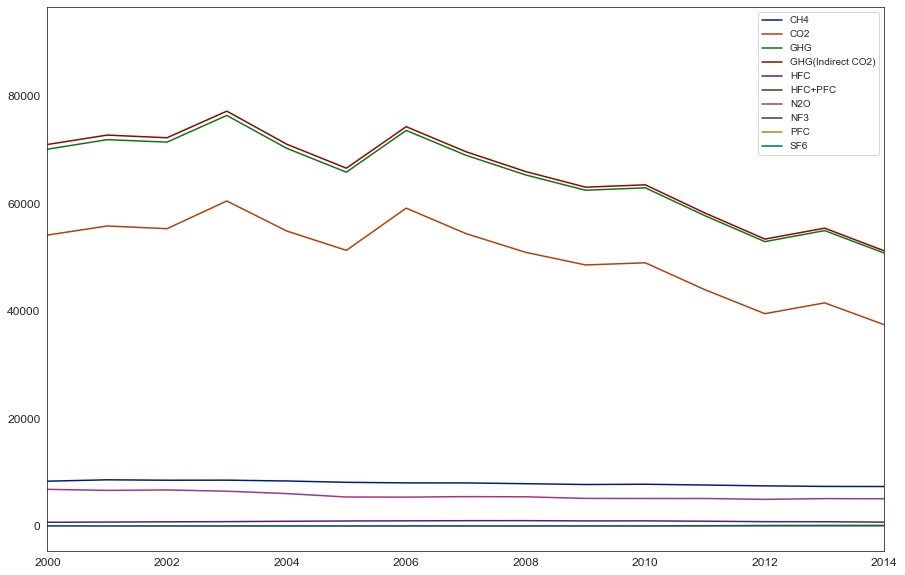

In [259]:
plot_the_country("Denmark")

May be after recession, **Denmark** had new laws on pollution control. There is a strong negative inclination.

Lets look at East-Asian countries

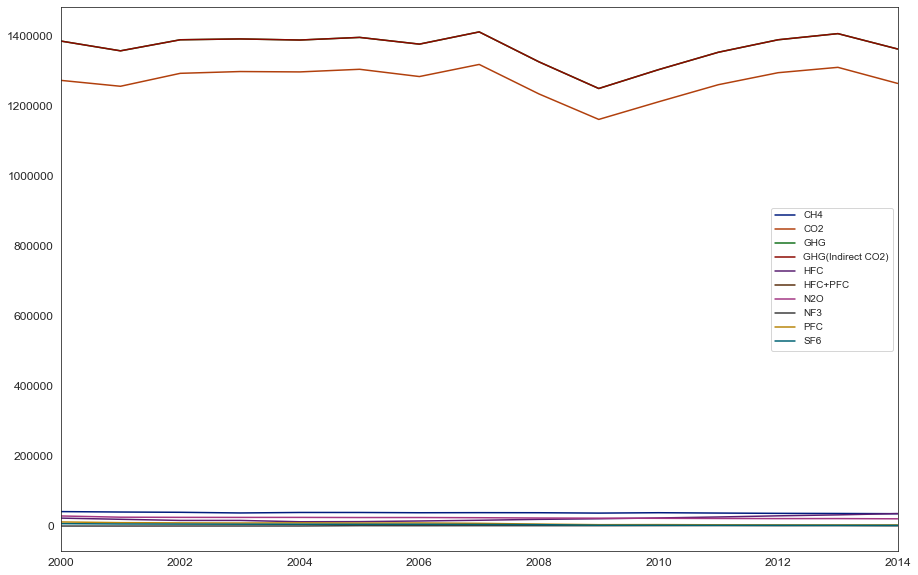

In [260]:
plot_the_country("Japan")

**Japan** had a decrease in CO2 emission during recession, may be they were affected the most or any new law arrived which reduced the purchasing power of their countymen. It requires more research.

**Conclusion-3** - We need to compare the emission data country wise instead of gas types,that can give us a better research output.

### Comparing Emission Data Country Wise

In [261]:
area_div = pd.pivot_table(replaced_emission, values='value', index=['category', 'year'], columns=['country_or_area'])
area_div.head(20)

country_or_area      Australia       Austria       Belarus       Belgium  \
category year                                                              
CH4      1990    118768.837813  10598.566361  17944.369142  12040.181048   
         1991    117744.641814  10462.096189  17258.134452  11999.377566   
         1992    116837.506726  10164.748677  16295.436192  11886.349715   
         1993    113837.511923  10073.833199  15583.113398  11838.303374   
         1994    110997.410185  9775.857792   14331.807083  11867.016600   
         1995    109900.735111  9674.049590   13611.075970  11947.638179   
         1996    109185.337720  9382.925634   13672.822022  11802.081834   
         1997    111898.854749  9011.517063   13578.265278  11689.898943   
         1998    111427.929806  8831.331453   13540.244709  11524.999684   
         1999    107889.224971  8645.176255   13212.462486  11265.277850   
         2000    111520.309552  8466.366071   12922.696280  10827.004563   
         2001    110301.733954  8284.300539   12799.025856  10386.252961   
         2002    108309.143528  8134.080336   12705.355450  9956.500859    
         2003    102574.207810  8061.205812   13734.631920  9372.468380    
         2004    103839.210857  8048.712308   14331.370196  9318.580720    
         2005    105887.562989  7809.615176   14727.060054  9074.769078    
         2006    104842.389866  7667.628872   15450.078576  8982.981926    
         2007    105174.667802  7543.052546   15646.793247  8947.755210    
         2008    103119.546054  7399.361705   16240.159788  8736.794244    
         2009    101886.833298  7294.264546   17118.031159  8668.573668    

country_or_area      Bulgaria         Canada      Croatia      Cyprus  \
category year                                                           
CH4      1990    16430.837565  95378.251942   3770.717761  693.566622   
         1991    15313.268855  97516.511686   3625.915742  704.355986   
         1992    14869.295993  101927.841563  3227.336089  733.570274   
         1993    13764.491319  105204.361167  3260.041563  761.678069   
         1994    12003.087341  108917.321071  3034.348436  773.175583   
         1995    12051.210562  113111.078283  2986.637175  797.533507   
         1996    11936.166516  116885.460266  2968.513006  819.083378   
         1997    11500.645277  118988.193048  2908.314030  826.651707   
         1998    10886.058568  120647.458345  2866.646554  830.270404   
         1999    10347.035078  120592.533777  2847.590855  831.090819   
         2000    10189.340058  120724.871831  2785.338223  847.453418   
         2001    9491.668896   119920.258788  2844.147841  887.602343   
         2002    9374.212548   117504.637071  2838.302617  921.251494   
         2003    10063.720369  116809.277477  2936.870511  917.705867   
         2004    9476.237783   117419.386087  3061.844195  914.712171   
         2005    8720.075935   116434.331258  3029.461752  894.249977   
         2006    8446.725322   115516.052739  3100.590412  894.042452   
         2007    8389.983299   113213.994031  3114.802057  915.518721   
         2008    8164.025188   110540.258265  3153.402762  919.096320   
         2009    7794.838368   106149.435213  3214.901483  921.274584   

country_or_area  Czech Republic      Denmark  ...  Russian Federation  \
category year                                 ...                       
CH4      1990    23315.046769    8082.707613  ...  942383.462118        
         1991    21607.175422    8279.662247  ...  875196.162997        
         1992    20139.159952    8364.646101  ...  794953.160990        
         1993    19226.589930    8570.915282  ...  737770.858519        
         1994    18086.829077    8437.693903  ...  680641.143638        
         1995    17744.942585    8497.613284  ...  655448.422294        
         1996    17564.912099    8608.320974  ...  637618.056003        
         1997    17105.079739    8506.801961  ...  627871.88965

In [262]:
countries = area_div.columns.values

In [263]:
def country_wise_plot(name):
    cname = area_div.loc[name]
    plt.plot(cname)
    plt.tick_params(labelsize=14)
    plt.legend(countries, loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 3)
    plt.rcParams["figure.figsize"] = [15, 10]

In [264]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

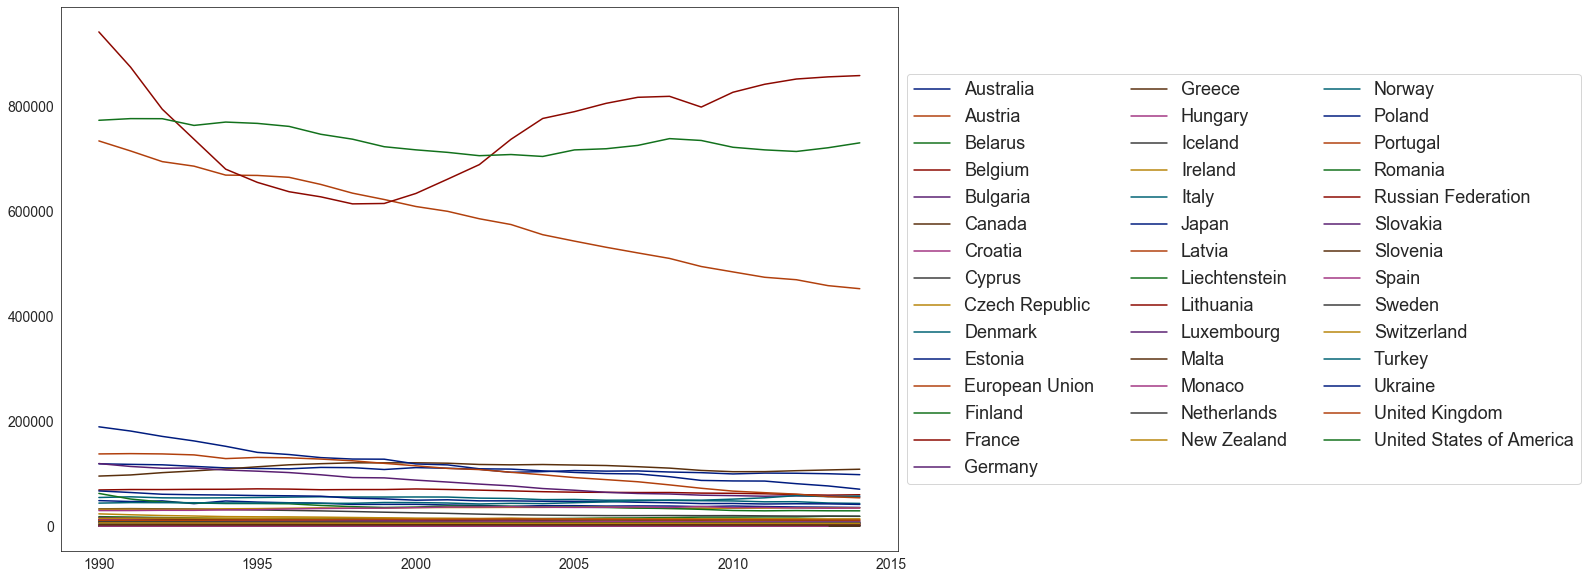

In [265]:
country_wise_plot(gases[0])

Above plot is OK for rough estimation but not good for a better grasp, hence let's design something that can plot the selected countries on the same graph with the same context.

### Comparing Countries By Passing Required Series

In [266]:
def gas_accord_country1(gas_name, country_name):                          # years from 1990-2004
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(1990,2004)
    plt.rcParams["figure.figsize"] = [15, 10]
    
def gas_accord_country2(gas_name, country_name):
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(2004,2017)
    plt.rcParams["figure.figsize"] = [15, 10]

In [267]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [268]:
countries_name = replaced_emission["country_or_area"].unique()

In [269]:
countries_name

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

## Analysing the data WRT gas name and country

### For Methane(CH4) emission:

#### 1. Country Set - 1 :

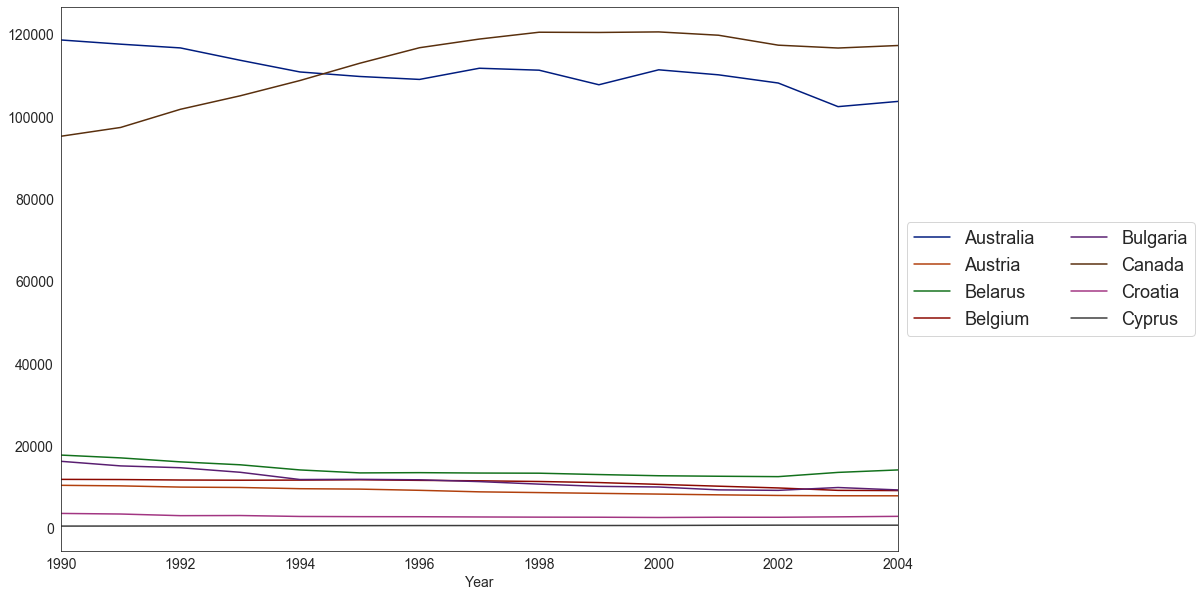

In [270]:
gas_accord_country1(gases[0],countries_name[:8])

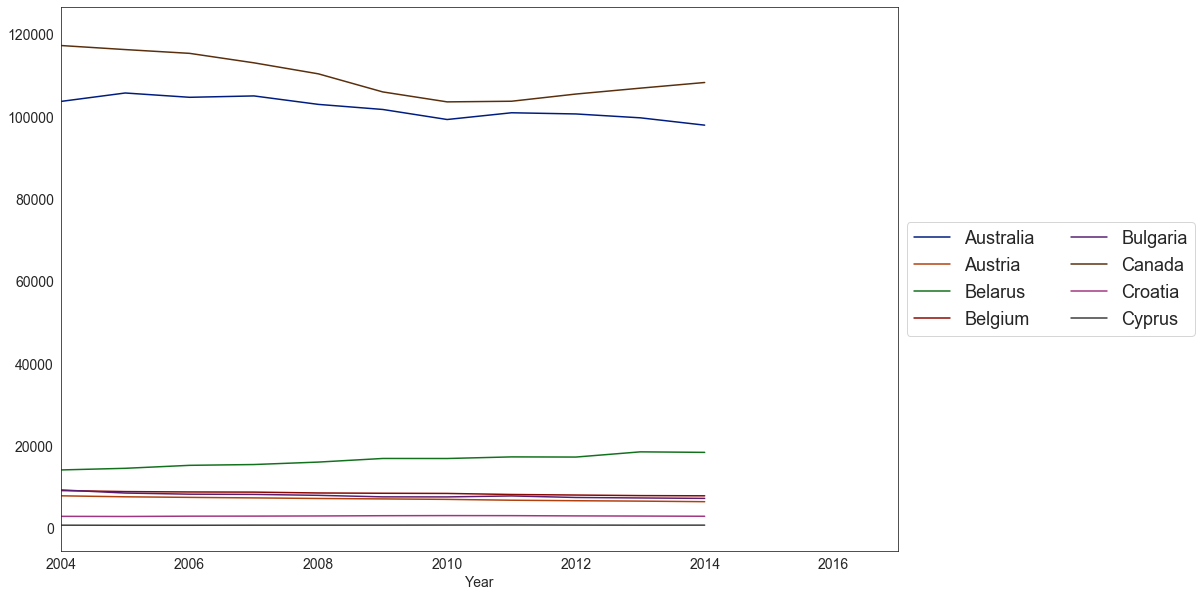

In [271]:
gas_accord_country2(gases[0],countries_name[:8])

#### 2. Country Set - 2 :

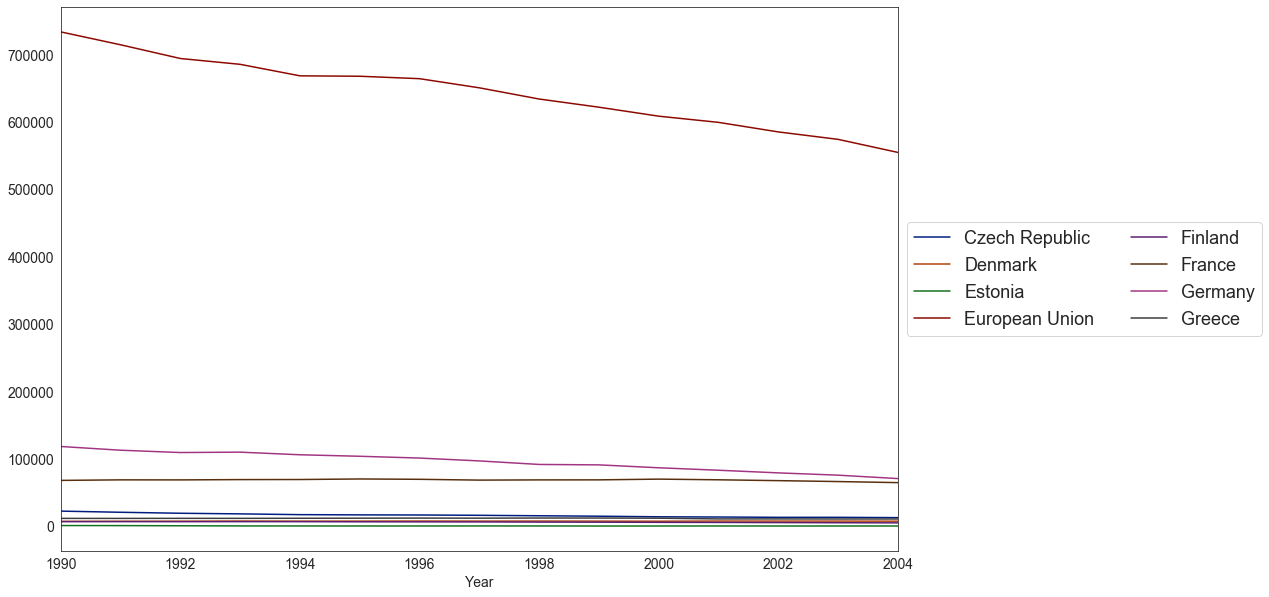

In [272]:
gas_accord_country1(gases[0],countries_name[8:16])

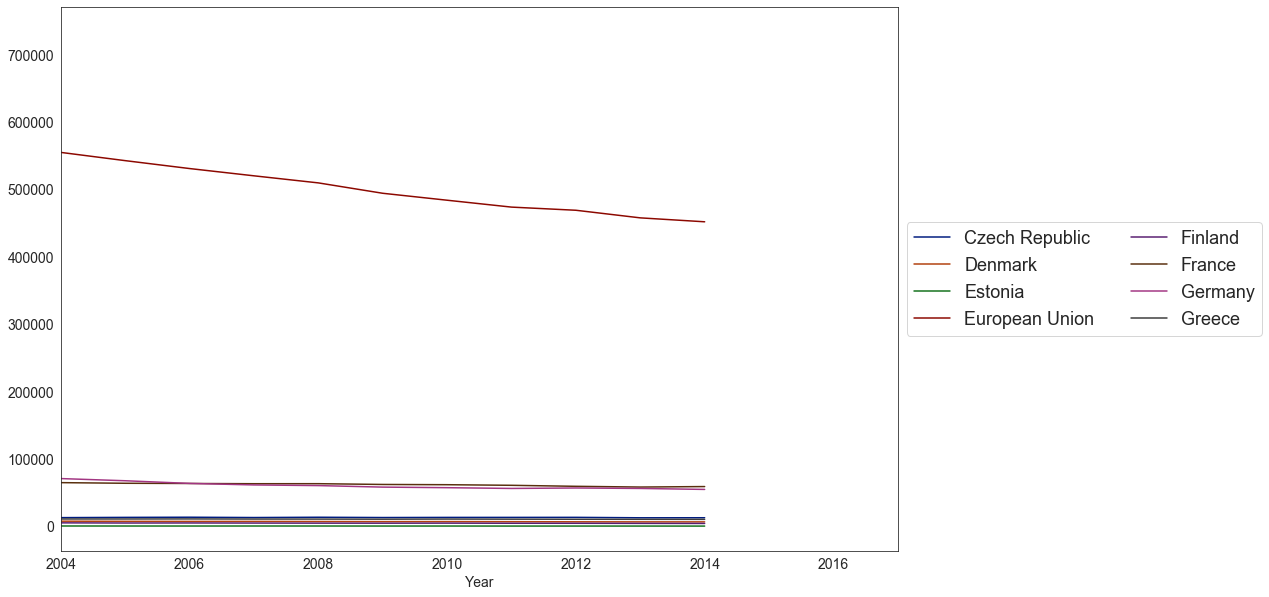

In [273]:
gas_accord_country2(gases[0],countries_name[8:16])

#### 3. Country Set - 3 :

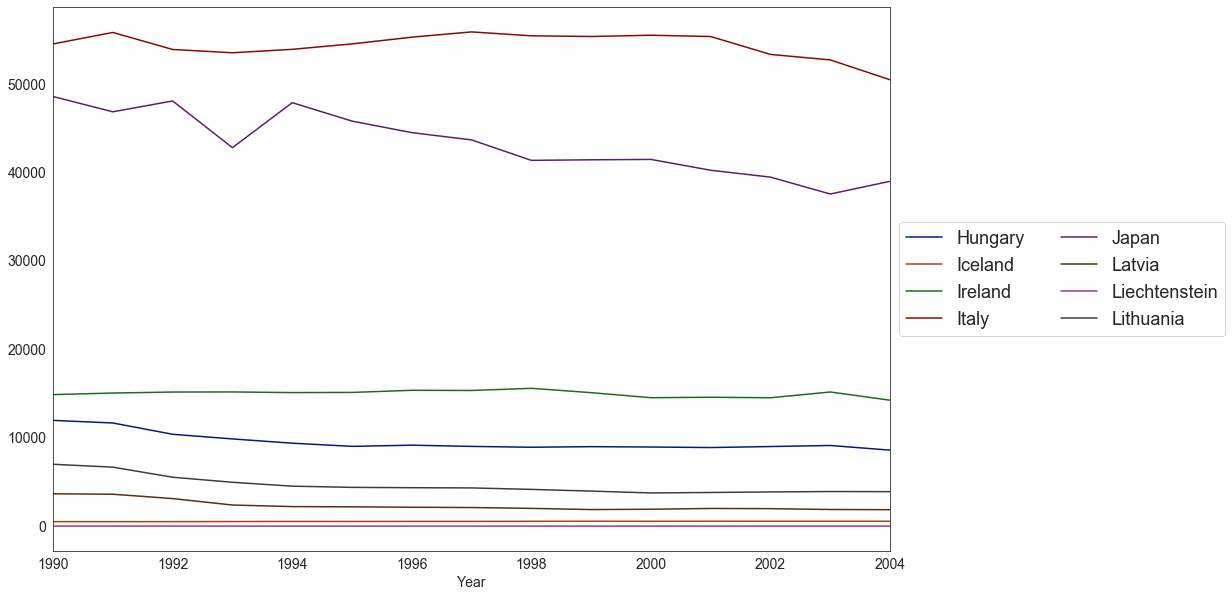

In [274]:
gas_accord_country1(gases[0],countries_name[16:24])

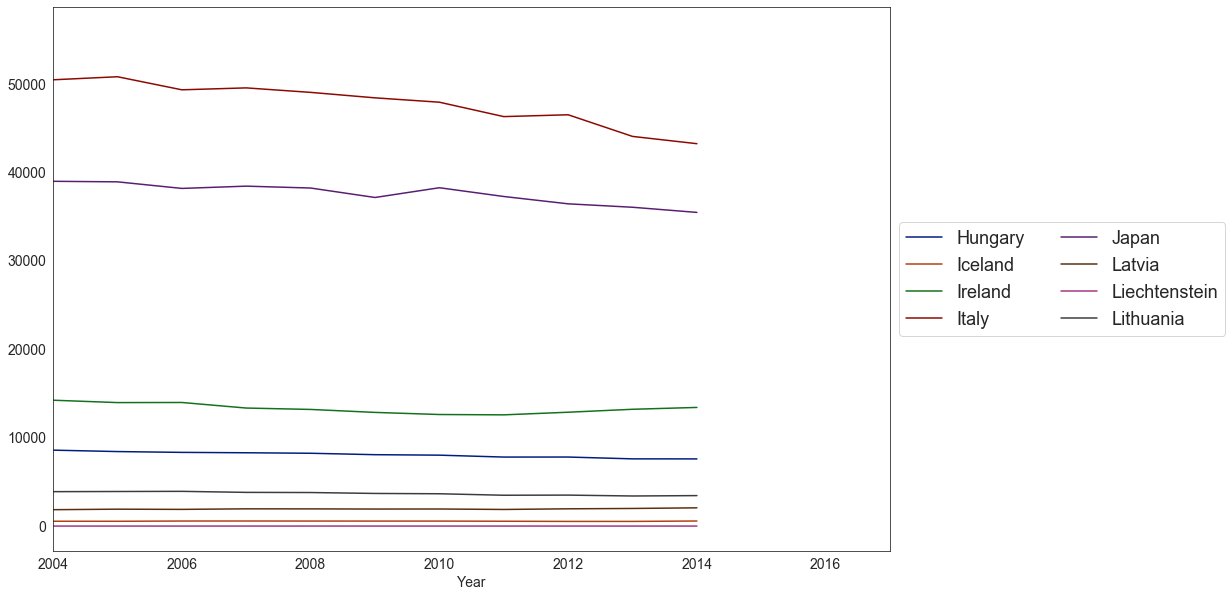

In [275]:
gas_accord_country2(gases[0],countries_name[16:24])

#### 3. Country Set - 4 :

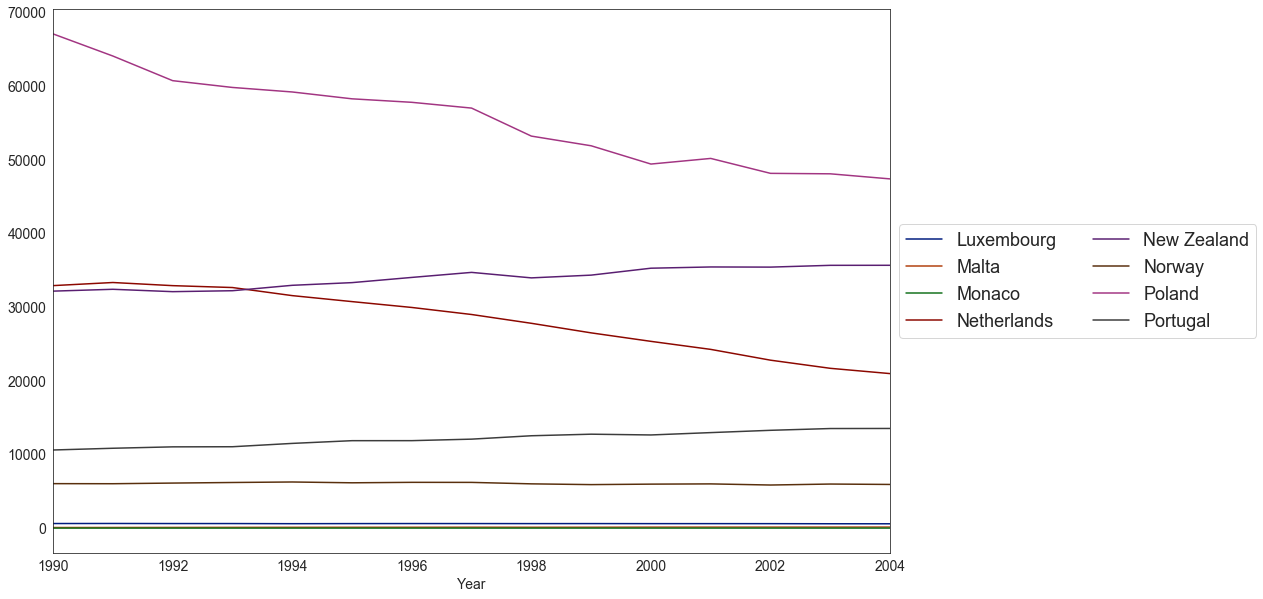

In [276]:
gas_accord_country1(gases[0],countries_name[24:32])

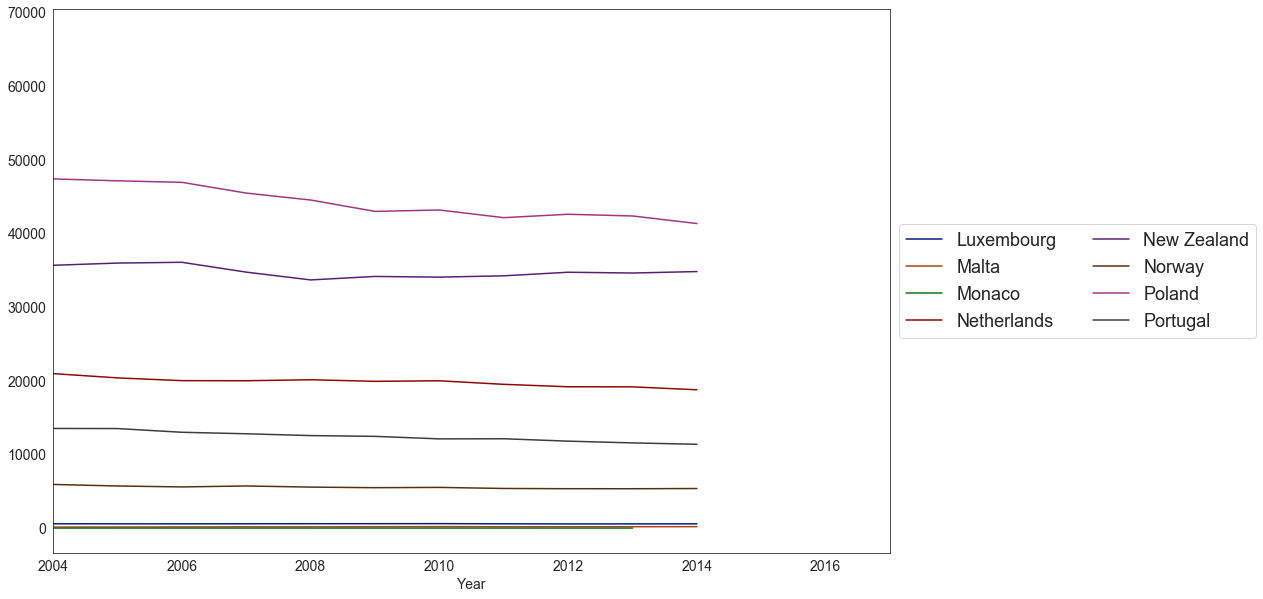

In [277]:
gas_accord_country2(gases[0],countries_name[24:32])

#### 4. Country Set - 4

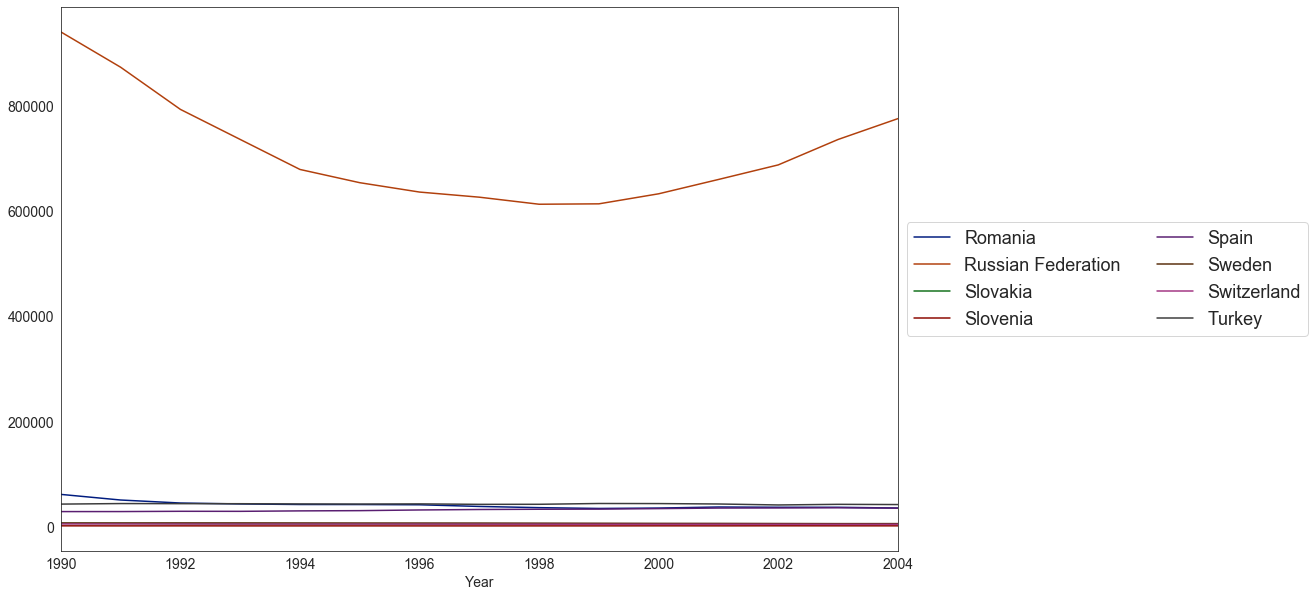

In [278]:
gas_accord_country1(gases[0],countries_name[32:40])

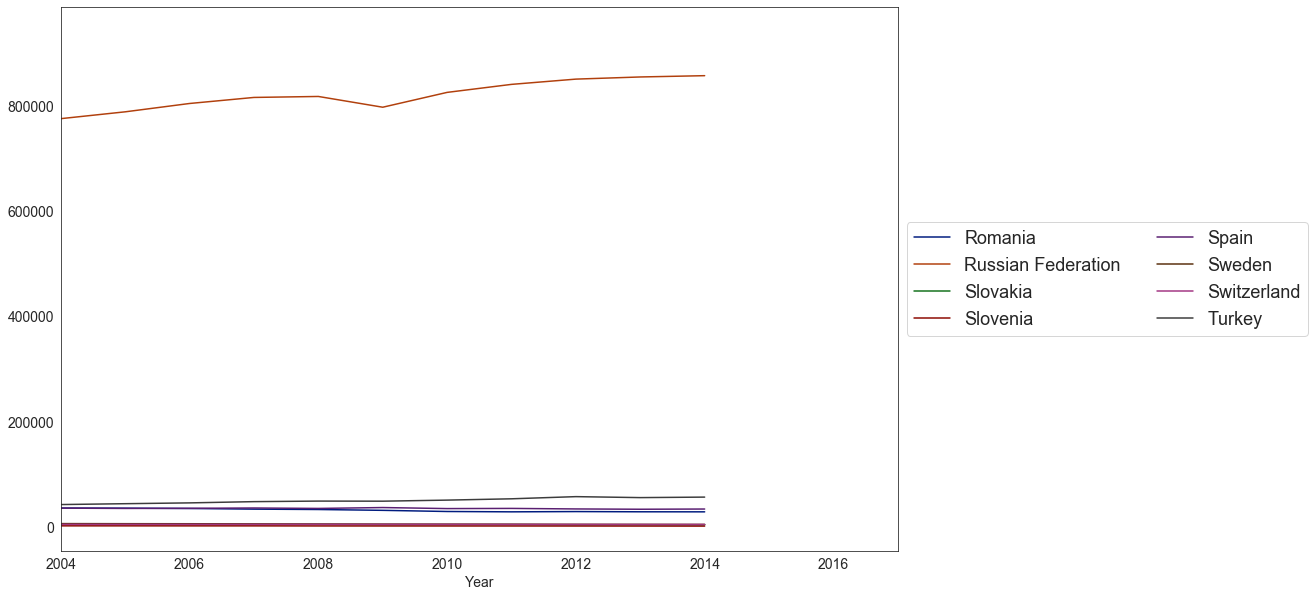

In [279]:
gas_accord_country2(gases[0],countries_name[32:40])

#### 5. Final Set -

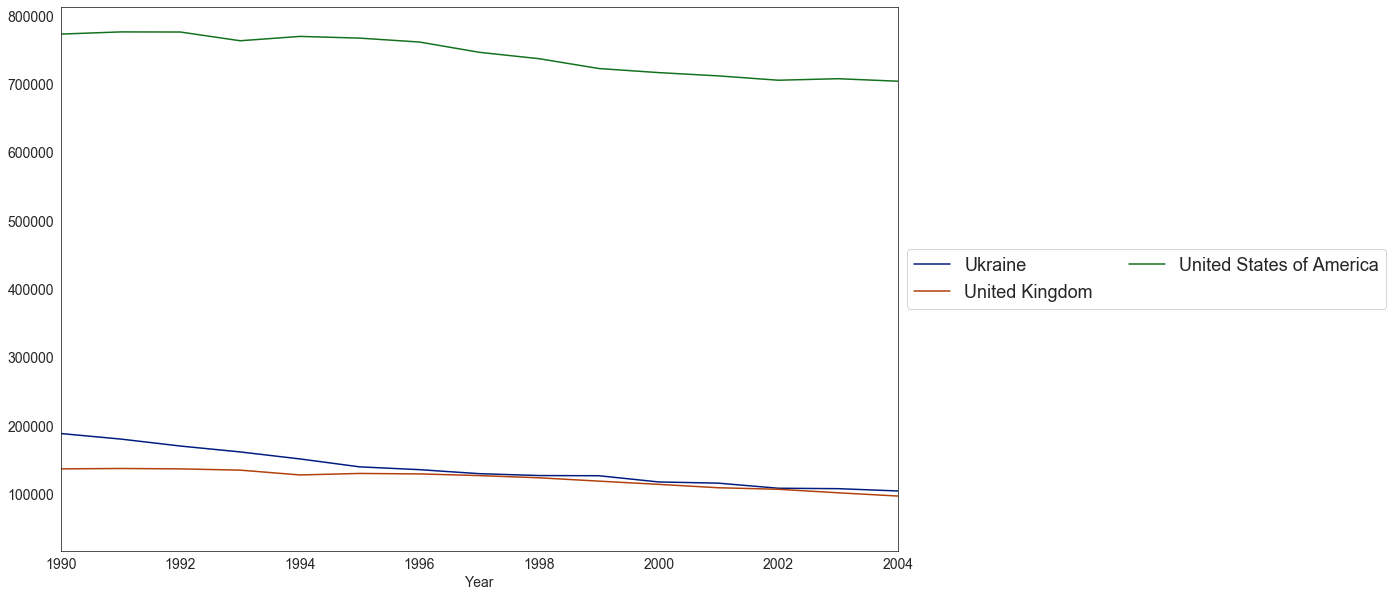

In [280]:
gas_accord_country1(gases[0],countries_name[40:43])

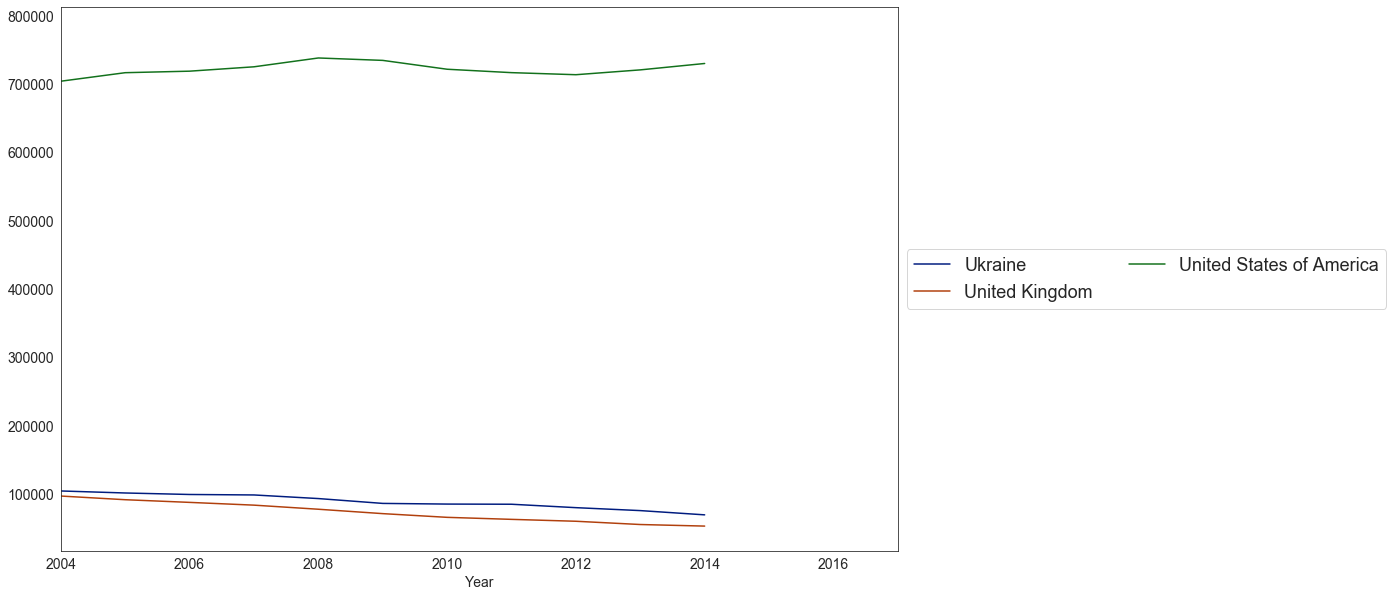

In [281]:
gas_accord_country2(gases[0],countries_name[40:43])

In [282]:
data_div.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896

### Cleaning the GHG & GHG(Indirect CO2) column

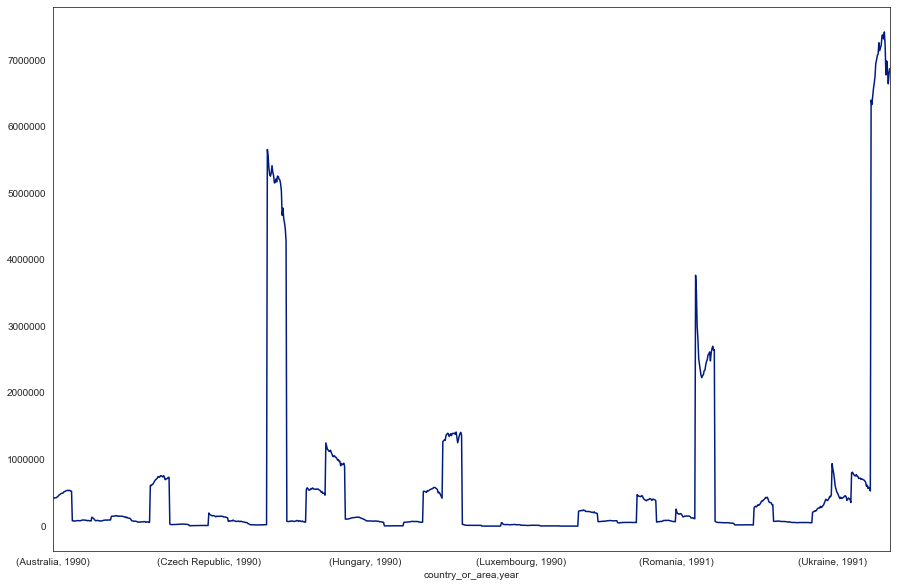

In [283]:
data_div["GHG"].plot()

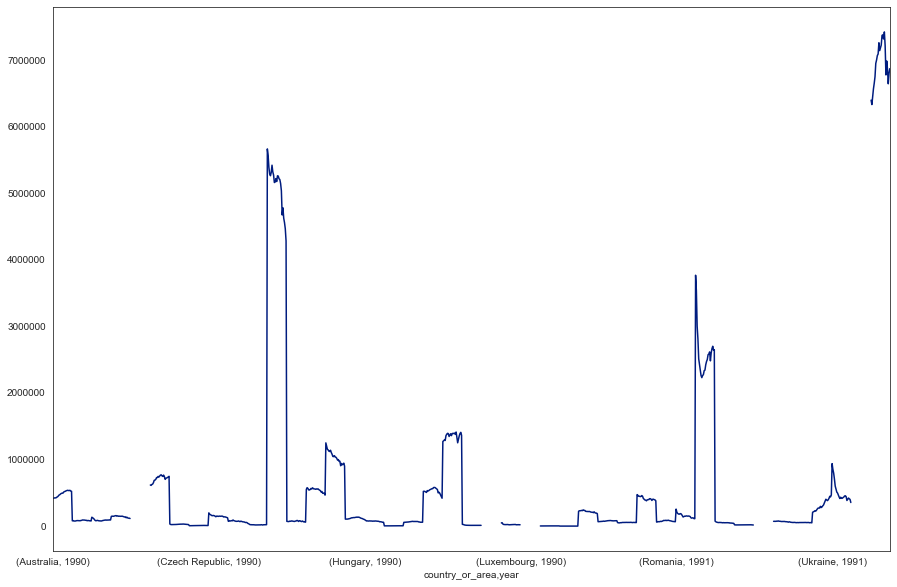

In [284]:
data_div["GHG(Indirect CO2)"].plot()

It seems like **GHG(Indirect CO2)** has NaN data and it's discontinuous. Also the above plots depict that both the column are almost similar, lets check if there is any dissimilarity.

In [285]:
cleaned_data = data_div

In [286]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896

In [287]:
cleaned_data["Check"] = cleaned_data["GHG"] - cleaned_data["GHG(Indirect CO2)"]

In [288]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  Check  
country_or_area year                                       
Australia       1990 NaN   4607.012919  211.018511  0.0    
                1991 NaN   4610.743294  228.944834  0.0    
                1992 NaN   4603.282544  246.858849  0.0    
                1993 NaN   3315.528376  264.759156  0.0    
                1994 NaN   2164.428749  282.640896  0.0

In [289]:
cleaned_data[(cleaned_data["Check"] !=0) & (cleaned_data["Check"] < 0)]

category                        CH4            CO2            GHG  \
country_or_area year                                                
Canada          1990  95378.251942   463493.332388  612866.051520   
                1991  97516.511686   454246.137946  605548.115938   
                1992  101927.841563  468546.458912  622763.761066   
                1993  105204.361167  467607.237235  624641.473382   
                1994  108917.321071  482691.671272  646008.211067   
                1995  113111.078283  497224.836925  665304.278406   
                1996  116885.460266  510619.682210  684666.716478   
                1997  118988.193048  525120.011176  700407.404392   
                1998  120647.458345  533794.453645  707998.083483   
                1999  120592.533777  550183.063388  721673.246637   
                2000  120724.871831  572290.385518  744240.711985   
                2001  119920.258788  564617.020300  733454.185193   
                2002  117504.637071  569862.145645  736272.786376   
                2003  116809.277477  587306.678538  754970.648843   
                2004  117419.386087  585414.860574  756240.206618   
                2005  116434.331258  579225.335720  747457.793975   
                2006  115516.052739  573479.269701  738096.488069   
                2007  113213.994031  596041.321974  758431.179854   
                2008  110540.258265  577444.930222  739036.728086   
                2009  106149.435213  542829.458896  696312.196589   
                2010  103730.441039  555003.760261  706402.873509   
                2011  103884.670075  558152.722938  709764.469823   
                2012  105633.624841  563423.613155  718346.886922   
                2013  107063.129352  573094.038846  731424.089563   
                2014  108436.716891  574099.775512  732418.883208   
Czech Republic  1990  23315.046769   161662.018872  196508.927568   
                1991  21607.175422   146047.339593  177638.103219   
                1992  20139.159952   141565.719740  170790.902493   
                1993  19226.589930   135588.565573  162967.290785   
                1994  18086.829077   129188.734109  155204.904913   
...                            ...             ...            ...   
Portugal        2010  12108.020408   53583.885860   71202.017653    
                2011  12123.974739   52150.653444   69653.821114    
                2012  11798.730235   50262.422442   67558.673047    
                2013  11560.465783   48495.550477   65752.062446    
                2014  11374.156180   48353.690330   65620.012274    
Switzerland     1990  6086.294429    44115.534086   53307.756710    
                1991  6023.587581    46144.809539   55253.574921    
                1992  5943.519115    45974.702541   54970.354096    
                1993  5835.377162    43556.276420   52327.796459    
                1994  5783.906341    42613.303737   51324.724589    
                1995  5776.092834    43368.457156   52204.747459    
                1996  5736.944700    44088.334947   52933.057625    
                1997  5594.106624    42971.624455   51677.567608    
                1998  5523.548656    44522.371421   53279.434242    
                1999  5422.284241    44354.543119   53037.598150    
                2000  5388.965450    43545.959706   52315.752741    
                2001  5429.094325    45002.278774   53905.411393    
                2002  5395.269986    43373.985550   52318.094833    
                2003  5317.731630    44587.980267   53537.540213    
                2004  5285.849999    45149.667089   54173.668528    
                2005  5302.882225    45778.089457   54858.053153    
                2006  5316.962726    45351.171995   54481.555378    
                2007  5296.651197    43360.385698   52555.336629    
                2008  5375.410734    44676.943967   54084.454250    
                2009  5292.027752    43509.086558   52776.287002   

 So there are 275 rows who has a differenc of **GHG** and **GHG(Indirect CO2)** column. So we can safely drop the **GHG(Indirect CO2) column**.

In [290]:
cleaned_data = cleaned_data.drop("GHG(Indirect CO2)",axis = 1)

### Checking the "HFC+PFC" Column 

In [291]:
cleaned_data["HFC+PFC"].isnull().sum()

999

In [292]:
Regular_data = cleaned_data[cleaned_data["HFC+PFC"].isnull()==False]
len(Regular_data)

75

So the conclusion is **HFC+PFC** column has only 75 values which are not nulls.

In [293]:
Regular_data = Regular_data.reset_index()

In [297]:
Regular_data.head(10)

category,country_or_area,year,CH4,CO2,GHG,HFC,HFC+PFC,N2O,NF3,PFC,SF6,Check
0,European Union,1990,734491.057034,4.462205e+06,5.656504e+06,29125.636300,5705.723894,388663.460586,23.775890,25369.662019,10919.699659,-8341.677584
1,European Union,1991,715378.704916,4.403723e+06,5.558237e+06,29148.253055,5236.723320,370242.088936,25.486229,23023.080380,11459.057988,-8158.236799
2,European Union,1992,695017.254203,4.259923e+06,5.378841e+06,31563.920261,5222.149630,355959.767869,27.370715,18844.424042,12282.827908,-7948.519233
3,European Union,1993,686376.821938,4.177107e+06,5.279951e+06,34486.617159,5215.637160,345876.471393,29.447229,17891.051869,12968.382049,-7723.746324
4,European Union,1994,669301.263462,4.161321e+06,5.255114e+06,39125.646161,5487.385110,348484.822972,32.494030,17217.942090,14142.844872,-7464.189726
5,European Union,1995,668698.051517,4.204481e+06,5.306108e+06,43748.978742,5773.246762,351343.564079,43.481084,16805.540057,15214.529485,-7055.768074
6,European Union,1996,665079.336733,4.304793e+06,5.413300e+06,50862.683324,4324.621056,356924.647677,69.420645,16147.636847,15098.003771,-7098.116638
7,European Union,1997,651528.738611,4.216525e+06,5.313562e+06,58699.699209,4208.604376,353901.179362,103.422375,14975.287478,13620.341702,-7002.717176
8,European Union,1998,634900.160180,4.207666e+06,5.265846e+06,60079.904751,4108.460476,331944.081021,116.818674,14155.142661,12875.110913,-6616.359695
9,European Union,1999,622775.452019,4.139003e+06,5.153485e+06,51748.841340,3947.177534,311617.795637,60.790961,13770.439811,10561.358463,-6250.472922


In [294]:
Regular_data.groupby("country_or_area").count()

category,year,CH4,CO2,GHG,HFC,HFC+PFC,N2O,NF3,PFC,SF6,Check
country_or_area,,,,,,,,,,,
European Union,25,25,25,25,25,25,25,25,25,25,25
Germany,25,25,25,25,25,25,25,25,25,25,25
United States of America,25,25,25,25,25,25,25,25,25,25,25


As we can see, the dataset has data for only for three countries

In [295]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

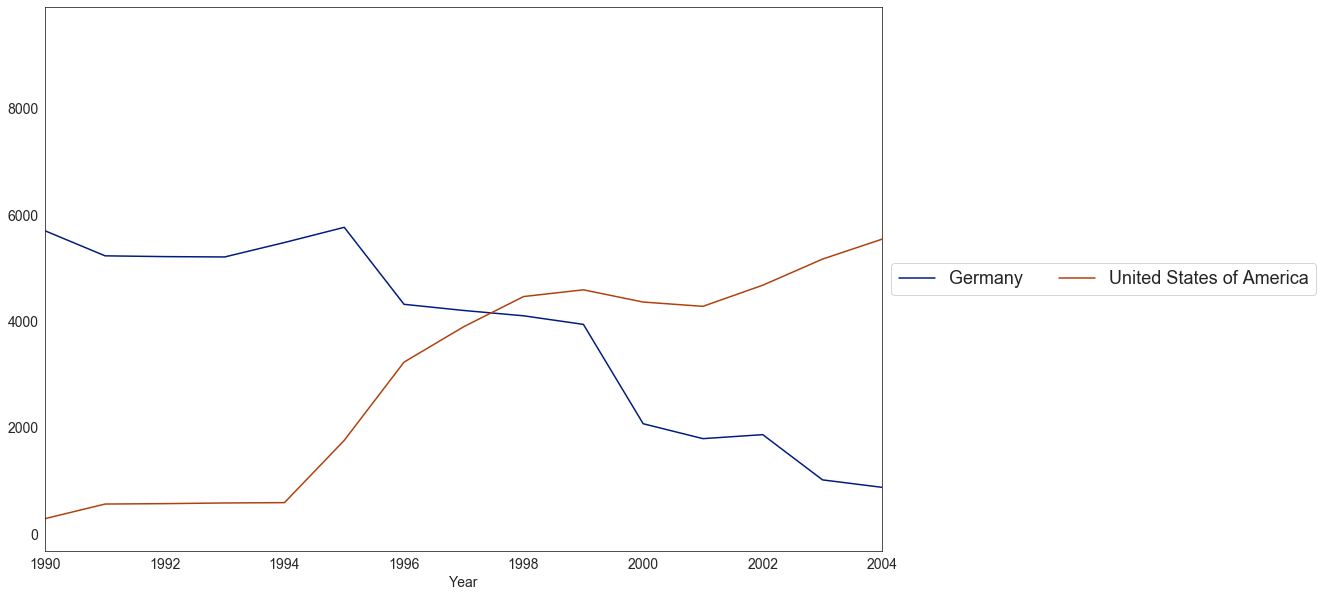

In [300]:
gas_accord_country1(gases[5],["Germany","United States of America"])

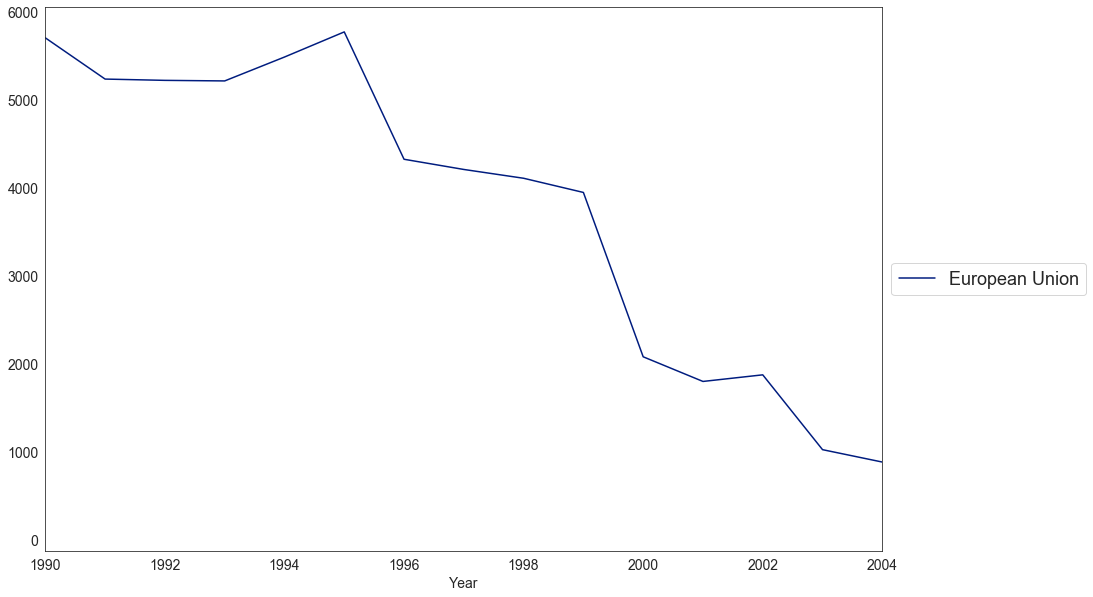

In [299]:
gas_accord_country1(gases[5],["European Union"])